# **Experiment Notebook**

___

## **_Importing the dependencies_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

## **_Importing the dataset_**

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
- Region_Code: Unique code for the region of the customer
- Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her - vehicle damaged in the past.]
- Annual_Premium: The amount customer needs to pay as premium in the year
- Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: [1 : Customer is interested, 0 : Customer is not interested]

In [3]:
df.shape

(381109, 12)

## **_EDA_**

In [4]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

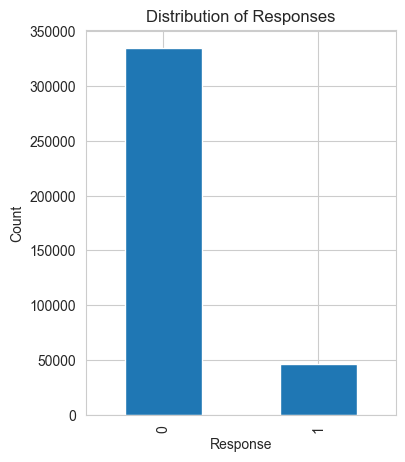

In [8]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(4,5))
value_counts.plot(kind='bar')
plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Distribution of Responses")
plt.show()

<Axes: >

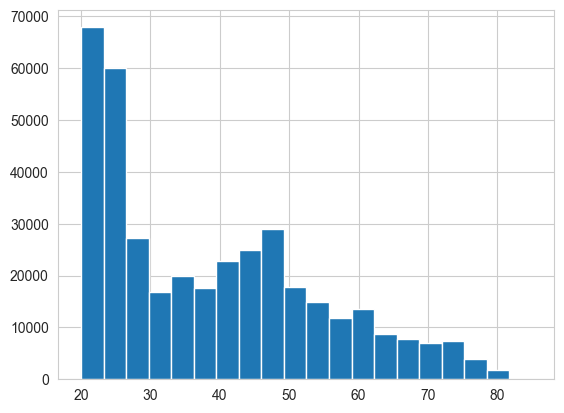

In [9]:
# checking distribution for age col
df['Age'].hist(bins=20)

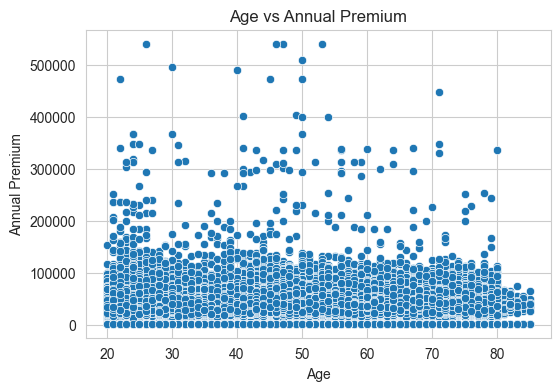

In [10]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

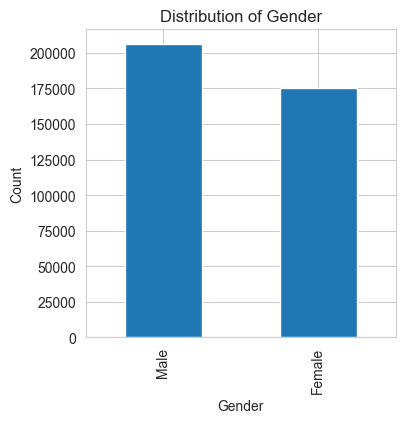

In [11]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

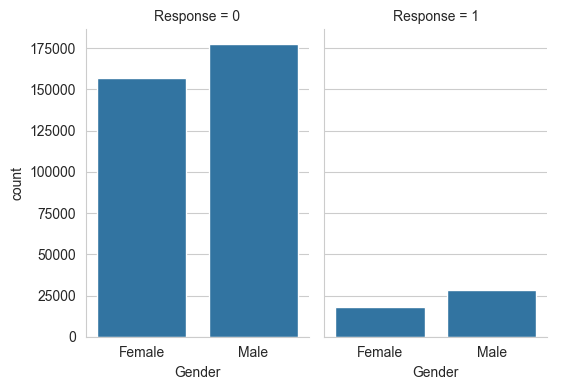

In [12]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7)

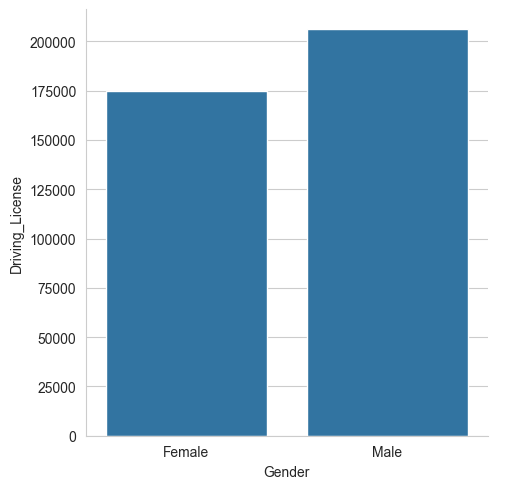

In [13]:
# driving license by gender

data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar");

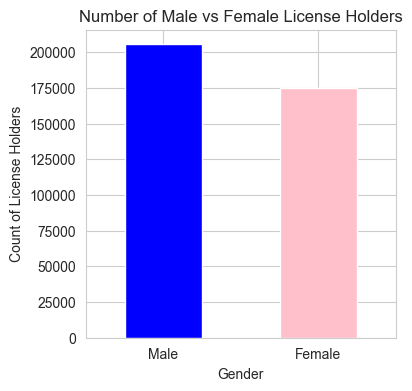

In [14]:
# Filter for only license holders (Driving_License == 1)
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()

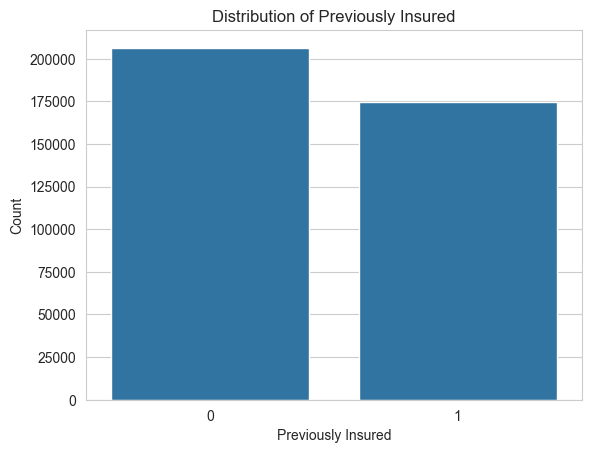

In [15]:
# customers with existing insurance

sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

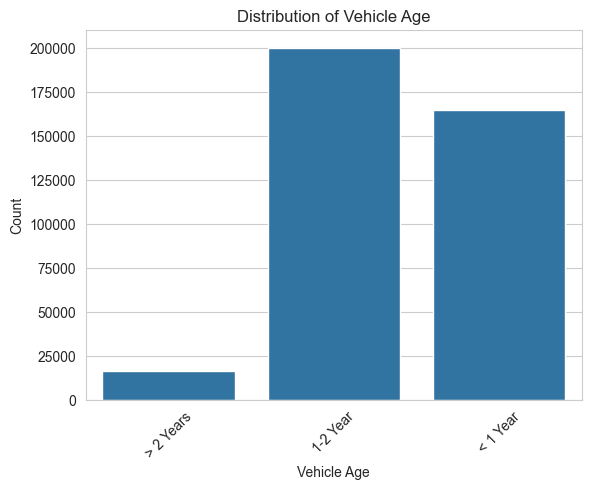

In [16]:
# checking vehicle age dist

sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [17]:
# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


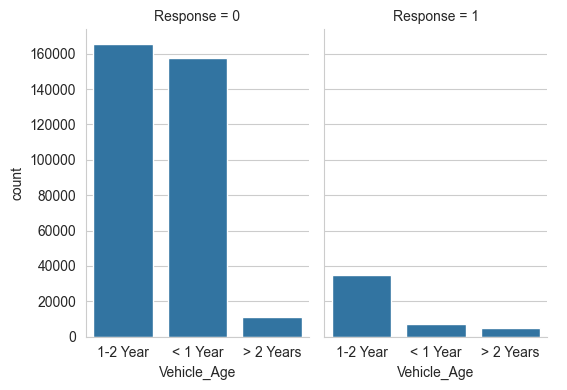

In [ ]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7)

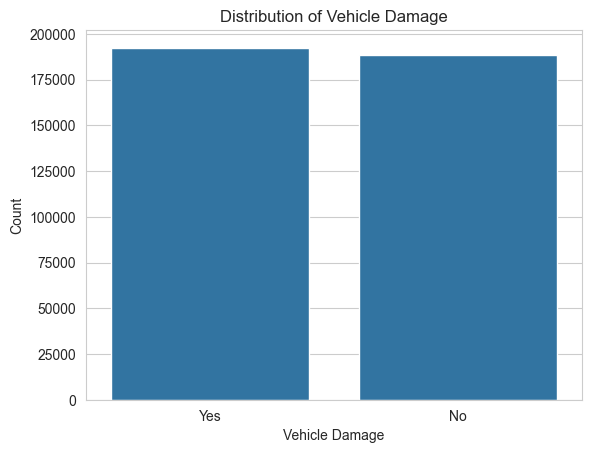

In [19]:
# dist for Vehicle_Damage col

sns.countplot(data=df, x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

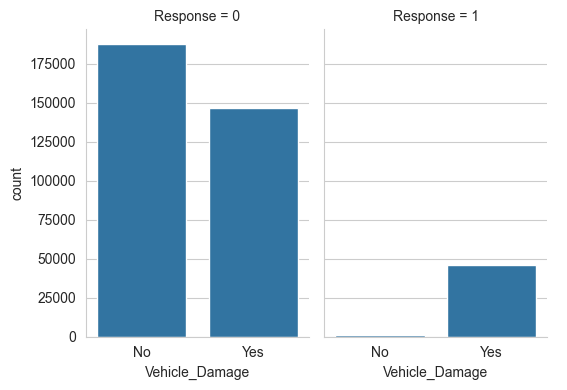

In [20]:
data = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7)

In [21]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

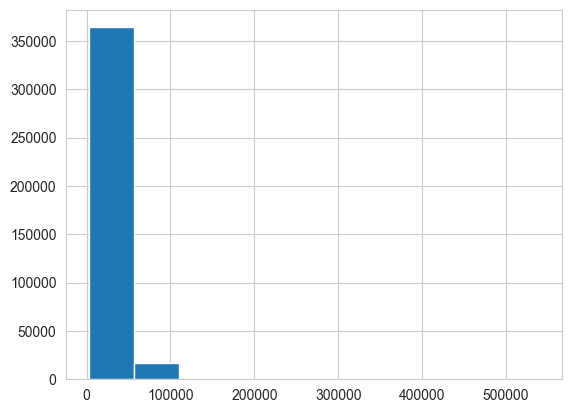

In [22]:
df['Annual_Premium'].hist(bins=10)

In [ ]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


## **_Data Pre-Processing_**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [25]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [ ]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

In [31]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [33]:
for col in df.columns:
    print(f"{col} ---> {df[col].dtype}")

id ---> int64
Gender ---> int64
Age ---> int64
Driving_License ---> int64
Region_Code ---> float64
Previously_Insured ---> int64
Vehicle_Age ---> object
Vehicle_Damage ---> object
Annual_Premium ---> float64
Policy_Sales_Channel ---> float64
Vintage ---> int64
Response ---> int64


In [34]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [35]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [38]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      381109 non-null  int64  
 1   Gender                  381109 non-null  object 
 2   Age                     381109 non-null  int64  
 3   Driving_License         381109 non-null  object 
 4   Region_Code             381109 non-null  object 
 5   Previously_Insured      381109 non-null  object 
 6   Annual_Premium          381109 non-null  float64
 7   Policy_Sales_Channel    381109 non-null  object 
 8   Vintage                 381109 non-null  int64  
 9   Response                381109 non-null  int64  
 10  Vehicle_Age_lt_1_Year   381109 non-null  object 
 11  Vehicle_Age_gt_2_Years  381109 non-null  object 
 12  Vehicle_Damage_Yes      381109 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 37.8+ MB


In [40]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

## **_Features and Target_**

In [41]:
train_target=df['Response']
train=df.drop(['Response'], axis = 1)

## **_Train - Test Split_**

In [42]:
# train-test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [43]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [44]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,1,0,0


## **_Model Trainer - Random Forest Classifier_**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [4, 6, ...], 'min_samples_split': [5, 7, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

my_params = {'n_estimators': [300], 
             'min_samples_split': [7], 
             'min_samples_leaf': [6], 
             'max_depth': [10], 
             'criterion': ['entropy']}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = my_params, n_iter = 300, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
# for above line of code, feel free to make changes if can be made better

model.fit(x_train,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['entropy'], 'max_depth': [10], 'min_samples_leaf': [6], 'min_samples_split': [7], ...}"
,n_iter,300
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [50]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [51]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

## **_Model Evaluation_**

In [52]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

In [53]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.50      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.69      0.50      0.47     95278
weighted avg       0.83      0.88      0.82     95278



___

___